In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error

In [301]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')

In [302]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [303]:
train["year"] = train["Date"].str.split("-").str.get(0)
train["month"] = train["Date"].str.split("-").str.get(1)
train["date"] = train["Date"].str.split("-").str.get(2)

In [304]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
 10  year           188340 non-null  object 
 11  month          188340 non-null  object 
 12  date           188340 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 18.7+ MB


C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='month'>

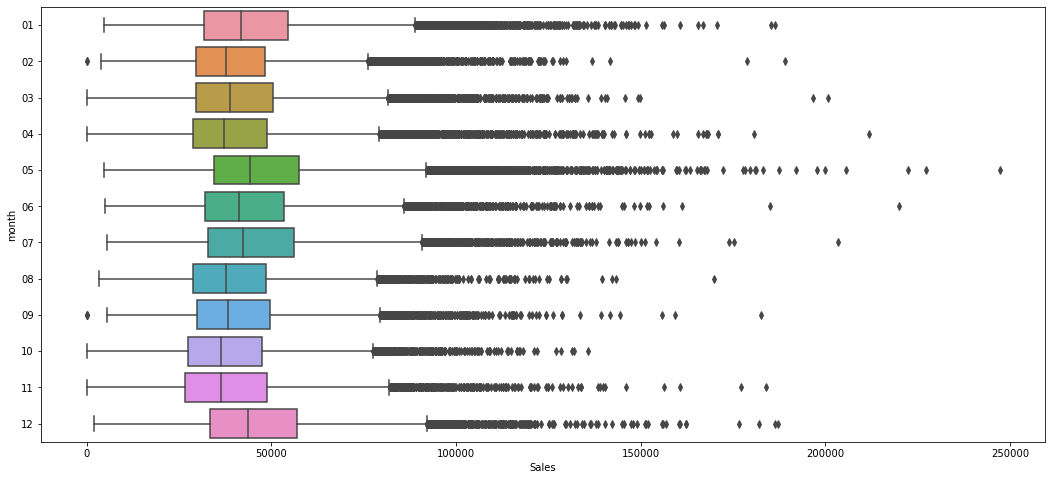

In [50]:
plt.figure(figsize=(18,8))
sns.boxplot(train['Sales'],train['month'])

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
 10  month          188340 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 15.8+ MB


In [305]:
train['Holiday'] = train['Holiday'].astype('object')

In [306]:
dumm = {'No':0,'Yes':1}
train['Discount'] = train['Discount'].map(dumm)
train['Discount'] = train['Discount'].astype('object')

In [307]:
train = train.drop(['#Order','ID','Date'],axis=1)

In [308]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store_id       188340 non-null  int64  
 1   Store_Type     188340 non-null  object 
 2   Location_Type  188340 non-null  object 
 3   Region_Code    188340 non-null  object 
 4   Holiday        188340 non-null  object 
 5   Discount       188340 non-null  object 
 6   Sales          188340 non-null  float64
 7   year           188340 non-null  object 
 8   month          188340 non-null  object 
 9   date           188340 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 14.4+ MB


In [268]:
train['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [309]:
df1 = train[train['month']=='06']
df2 = train[train['month']=='07']
df3 = train[train['year']=='2019']

In [336]:
df3.month.unique()

array(['01', '02', '03', '04', '05'], dtype=object)

In [310]:
df = pd.concat([df1,df2,df3])
df.shape

(77380, 10)

In [311]:
df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,year,month,date
55115,116,S2,L3,R3,0,1,32601.0,2018,06,01
55116,110,S2,L3,R3,0,1,32763.0,2018,06,01
55117,214,S1,L1,R4,0,1,35703.0,2018,06,01
55118,199,S1,L1,R4,0,1,37224.0,2018,06,01
55119,319,S3,L1,R2,0,1,63075.0,2018,06,01


In [273]:
df.date.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [177]:
dumm = {['01','02','03']:'q1',['04','05','06']:'q2',['07','08','09']:'q3',['10','11','12']:'q4'}
train['month'] = train['month'].map(dumm)
#train['month'] = train['month'].astype('object')

TypeError: unhashable type: 'list'

In [178]:
for i in train['month']:
    if 1<=i<=3:
        train['month']='q1'
    elif 4<
        train['month']='q2'
        
train.month.value_counts()

q2    188340
Name: month, dtype: int64

In [ ]:
train.

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 55115 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store_id       77380 non-null  int64  
 1   Store_Type     77380 non-null  object 
 2   Location_Type  77380 non-null  object 
 3   Region_Code    77380 non-null  object 
 4   Holiday        77380 non-null  object 
 5   Discount       77380 non-null  object 
 6   Sales          77380 non-null  float64
 7   year           77380 non-null  object 
 8   month          77380 non-null  object 
 9   date           77380 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 6.5+ MB


In [312]:
print('before',df.shape)
train = pd.get_dummies(df,drop_first=True)
print('after shape',train.shape)

before (77380, 10)
after shape (77380, 51)


In [313]:
train.head()

,Store_id,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,...,date_22,date_23,date_24,date_25,date_26,date_27,date_28,date_29,date_30,date_31
55115,116,32601.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55116,110,32763.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55117,214,35703.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55118,199,37224.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55119,319,63075.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [334]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 55115 to 188339
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store_id          77380 non-null  int64  
 1   Sales             77380 non-null  float64
 2   Store_Type_S2     77380 non-null  uint8  
 3   Store_Type_S3     77380 non-null  uint8  
 4   Store_Type_S4     77380 non-null  uint8  
 5   Location_Type_L2  77380 non-null  uint8  
 6   Location_Type_L3  77380 non-null  uint8  
 7   Location_Type_L4  77380 non-null  uint8  
 8   Location_Type_L5  77380 non-null  uint8  
 9   Region_Code_R2    77380 non-null  uint8  
 10  Region_Code_R3    77380 non-null  uint8  
 11  Region_Code_R4    77380 non-null  uint8  
 12  Holiday_1         77380 non-null  uint8  
 13  Discount_1        77380 non-null  uint8  
 14  year_2019         77380 non-null  uint8  
 15  month_02          77380 non-null  uint8  
 16  month_03          77380 non-null  u

In [335]:
test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Store_id          22265 non-null  int64
 1   Store_Type_S2     22265 non-null  uint8
 2   Store_Type_S3     22265 non-null  uint8
 3   Store_Type_S4     22265 non-null  uint8
 4   Location_Type_L2  22265 non-null  uint8
 5   Location_Type_L3  22265 non-null  uint8
 6   Location_Type_L4  22265 non-null  uint8
 7   Location_Type_L5  22265 non-null  uint8
 8   Region_Code_R2    22265 non-null  uint8
 9   Region_Code_R3    22265 non-null  uint8
 10  Region_Code_R4    22265 non-null  uint8
 11  Holiday_1         22265 non-null  uint8
 12  Discount_1        22265 non-null  uint8
 13  month_07          22265 non-null  uint8
 14  date_02           22265 non-null  uint8
 15  date_03           22265 non-null  uint8
 16  date_04           22265 non-null  uint8
 17  date_05           22265 non-nul

In [314]:
X = train.drop('Sales',axis=1)
y = train['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [315]:
lir = LinearRegression()
lir_model = lir.fit(X_train,y_train)

In [316]:
y_pred = lir_model.predict(X_test)
mean_squared_log_error(y_test,y_pred)

0.09577738871295711

# BAGGING

In [317]:
rfc = RandomForestRegressor()
rfc_model_whole = rfc.fit(X_train,y_train)
y_pred = rfc_model_whole.predict(X_test)
mean_squared_log_error(y_test,y_pred)

0.0631848996949831

# BOOSTING

In [318]:
from xgboost import XGBRegressor
xgrd = XGBRegressor()
xgrd_model_whole = xgrd.fit(X_train,y_train)
y_pred = xgrd_model_whole.predict(X_test)
mean_squared_log_error(y_test,y_pred)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [319]:
Grd = GradientBoostingRegressor()
grd_model_whole = Grd.fit(X_train,y_train)
y_pred = grd_model_whole.predict(X_test)
mean_squared_log_error(y_test,y_pred)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [320]:
Ada = AdaBoostRegressor()
ada_model_whole = Ada.fit(X_train,y_train)
y_pred = ada_model_whole.predict(X_test)
mean_squared_log_error(y_test,y_pred)

0.24003864088726728

# TREE

In [321]:
dt = DecisionTreeRegressor()
dt_model_whole = dt.fit(X_train,y_train)
y_pred = dt_model_whole.predict(X_test)
mean_squared_log_error(y_test,y_pred)

0.10028283401162207

# NEIGHBOR

In [322]:
knn = KNeighborsRegressor()
knn_model_whole = knn.fit(X_train,y_train)
y_pred = knn_model_whole.predict(X_test)
mean_squared_log_error(y_test,y_pred)

0.09822578584830535

In [323]:
lasso = Lasso(alpha = 0.1, max_iter = 100)

# fit the model on train set
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mean_squared_log_error(y_test,y_pred)

C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 776014920178.3584, tolerance: 2042519984.8800514
  model = cd_fast.enet_coordinate_descent(


0.09577390606305951

In [324]:
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
mean_squared_log_error(y_test,y_pred)

0.09577187746807486

In [163]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20],
                   'max_iter':[100,500,1000]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')



C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9057069223912.87, tolerance: 4026864838.6477957
  model = cd_fast.enet_coordinate_descent(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9125740232748.049, tolerance: 4053465592.024393
  model = cd_fast.enet_coordinate_descent(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9135630761179.86, tolerance: 4048954977.447869
  model = cd_fast.enet_coordinate_descent(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9134882424245.725, tolerance: 4050461794.3953395
  model = cd_fast.enet_coordinate_descent(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9115568506844.719, tolerance: 4053941922.867453
  model = cd_fast.enet_coordinate_descent(


Best parameters for Lasso Regression:  {'alpha': 0.1, 'max_iter': 100} 



In [158]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)

y_pred = enet.predict(X_test)
mean_squared_log_error(y_test,y_pred)

0.12292802512186808

In [325]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [326]:
test.shape

(22265, 8)

In [327]:
test["year"] = test["Date"].str.split("-").str.get(0)
test["month"] = test["Date"].str.split("-").str.get(1)
test["date"] = test["Date"].str.split("-").str.get(2)

In [328]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,year,month,date
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,2019,06,01
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,2019,06,01
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,2019,06,01
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,2019,06,01
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,2019,06,01


In [329]:
test_d = test.drop(['ID','Date'],axis=1)

In [330]:
#test_d['month'] = test_d['month'].astype(int)
#test_d['date'] = test_d['date'].astype(int)
test_d['Holiday'] = test_d['Holiday'].astype('object')
dumm = {'No':0,'Yes':1}
test_d['Discount'] = test_d['Discount'].map(dumm)
test_d['Discount'] = test_d['Discount'].astype('object')

In [331]:
print('before',test_d.shape)
test_d = pd.get_dummies(test_d,drop_first=True)
print('after shape',test_d.shape)

before (22265, 9)
after shape (22265, 44)


In [296]:
ID = test['ID']

In [332]:
y_pred_test = lir_model.predict(test_d)
y_pred_series = pd.Series(y_pred_test)

data = {"ID": ID,
        "Sales": y_pred_series}
df = pd.concat(data,
               axis = 1)
new_df = df.set_index("ID")
submission_data = new_df.to_csv('2-DAY submission lir 6,7 month&date,year train.csv')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 50 is different from 44)

In [ ]:
base_learners = [('rf_model', RandomForestRegressor()),
                 ('KNN_model', XGBRegressor())]

stack_model = StackingRegressor(estimators = base_learners, final_estimator = XGBRegressor())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

In [ ]:
y_pred_test = xgrd_model_whole.predict(test_d)
y_pred_series = pd.Series(y_pred_test)

data = {"ID": ID,
        "Sales": y_pred_series}
df = pd.concat(data,
               axis = 1)
new_df = df.set_index("ID")
submission_data = new_df.to_csv('day2 submission xg 6,7 month&date train.csv')